In [1]:
import warnings
import pandas as pd
import yfinance as yf
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('extracted_BTCUSDT_1h.csv')
df = df.drop(columns=['open_time', 'close_time', 'count', 'Unnamed: 0', 'Unnamed: 0.1'])
df

,open,high,low,close,volume,long,rsi_value,rsi_over_80,rsi_under_20,stochRsi_value,...,price_over_pSar,sma_value_9,price_over_sma,ichimoku_span_A,ichimoku_span_B,ichimoku_tenkan_sen,ichimoku_kijun_sen,tenkan_over_kijun,spanaA_over_spanB,ichimoku_price_in_cloud_color
0,43820.01,44059.00,43661.63,43694.48,2001.56071,1,100.000000,1,0,0.000000,...,0,43694.480000,0,43860.3150,43860.315,43860.315,43860.315,0,0,-1
1,43696.14,43803.94,43417.61,43742.74,1292.55848,1,100.000000,1,0,0.000000,...,0,43718.610000,1,43738.3050,43738.305,43738.305,43738.305,0,0,1
2,43742.74,43794.89,43283.03,43379.01,1348.70735,1,10.968949,0,1,0.000000,...,0,43605.410000,0,43671.0150,43671.015,43671.015,43671.015,0,0,-1
3,43379.00,43680.00,43352.28,43635.79,993.11980,1,46.906556,0,0,0.000000,...,0,43613.005000,1,43671.0150,43671.015,43671.015,43671.015,0,0,-1
4,43635.79,43715.71,43456.46,43625.02,982.32555,1,46.066645,0,0,0.000000,...,0,43615.408000,1,43671.0150,43671.015,43671.015,43671.015,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,20433.90,20438.01,20360.37,20371.72,12193.69642,0,39.974231,0,0,0.192978,...,0,20450.442222,0,20535.9550,20610.405,20529.975,20541.935,0,1,-1
9500,20371.40,20441.99,20353.77,20401.49,7588.08696,0,42.092002,0,0,0.288475,...,0,20413.881111,0,20519.3875,20610.405,20496.840,20541.935,0,1,-1
9501,20401.49,20430.80,20390.23,20406.58,4043.39784,0,42.465761,0,0,0.305329,...,0,20381.471111,1,20519.3875,20584.580,20496.840,20541.935,0,1,-1
9502,20407.46,20501.76,20375.11,20479.48,11124.35235,0,47.674804,0,0,0.540221,...,0,20397.381111,1,20463.7050,20584.580,20385.475,20541.935,0,1,0


In [3]:
X = df.drop(['long'], axis = 1)
Y_long = df.loc[:, 'long']
# Y_short = df.loc[:, 'short']

In [4]:
X_train, X_test, Y_long_train, Y_long_test = train_test_split(X, Y_long, test_size = 0.2)

In [5]:
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, Y_long_train)

In [6]:
Y_long_predict = decisionTree.predict(X_test)

In [7]:
confusion_matrix(Y_long_predict, Y_long_test)

array([[941,  21, 147],
       [ 38,  55,  22],
       [152,  22, 503]])

In [8]:
tp = Y_long_test[Y_long_test == 1].count()
sl = Y_long_test[Y_long_test == -1].count()
neutral = Y_long_test[Y_long_test == 0].count()

tp_predict = len(Y_long_predict[Y_long_predict == 1])
sl_predict = len(Y_long_predict[Y_long_predict == -1])
neutral_predict = len(Y_long_predict[Y_long_predict == 0])

print("Actual TP Num: {tp} vs Predicted TP Num: {tp_predict}".format(tp = tp, tp_predict = tp_predict))
print("Actual SL Num: {sl} vs Predicted SL Num: {sl_predict}".format(sl = sl, sl_predict = sl_predict))
print("Actual Neutral Num: {n} vs Predicted Neutral Num: {n_p}".format(n = neutral, n_p = neutral_predict))

Actual TP Num: 672 vs Predicted TP Num: 677
Actual SL Num: 1131 vs Predicted SL Num: 1109
Actual Neutral Num: 98 vs Predicted Neutral Num: 115


In [9]:
print(classification_report(Y_long_test, Y_long_predict))

              precision    recall  f1-score   support

          -1       0.85      0.83      0.84      1131
           0       0.48      0.56      0.52        98
           1       0.74      0.75      0.75       672

    accuracy                           0.79      1901
   macro avg       0.69      0.71      0.70      1901
weighted avg       0.79      0.79      0.79      1901



In [10]:
decisionTree.tree_

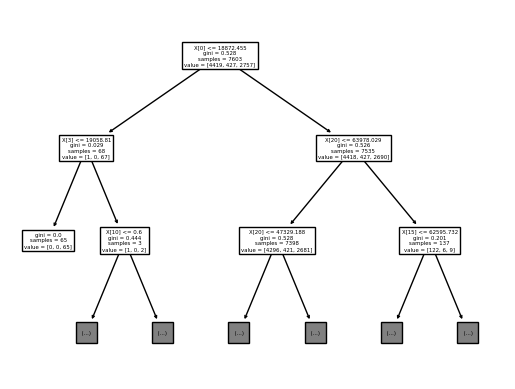

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(decisionTree, max_depth = 2)
plt.show()